In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data
matched_offers = pd.read_pickle(r'data\04_fct\fct_matched_offers.pkl')
matched_offers.head()

,customer_id,age,income,days_as_member,gender_F,gender_M,gender_O,gender_Unknown,offer_id,offer_received,...,email,mobile,social,web,is_bogo,is_discount,is_informational,expiration,total_transactions,total_transaction_amount
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,2906b810c7d4411798c6938adc9daaa5,168.0,...,1,1,0,1,0,1,0,336.0,0.0,0.00
1,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,336.0,...,1,0,0,1,0,1,0,576.0,0.0,0.00
2,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,fafdcd668e3743c1bb461111dcafc2a4,408.0,...,1,1,1,1,0,1,0,648.0,5.0,10.17
3,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,2298d6c36e964ae4a3e7e9706d1fb8c2,504.0,...,1,1,1,1,0,1,0,672.0,3.0,7.54
4,0610b486422d4921ae7d2bf64640c50b,55.0,112000.0,376,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,408.0,...,1,1,0,1,1,0,0,576.0,1.0,23.22


In [3]:
### Drop unnecessary columns and simplify data set ###
# Dropping 'offer_received' because we know that all of the records are offers that have been received
matched_offers.drop(['offer_received'], axis=1, inplace=True)

# Dropping 'time_to_completion' because we can leverage 'expiration' as a rough gauge of how long it took to complete the offer
# Could potentially fill this with the expiration column
matched_offers.drop(['time_to_complete'], axis=1, inplace=True)

# Convert offer_viewed and offer_completed to boolean
matched_offers['offer_viewed'] = matched_offers['offer_viewed'].notnull().astype(int)
matched_offers['offer_completed'] = matched_offers['offer_completed'].notnull().astype(int)

# Convert total_transactions to int
matched_offers['total_transactions'] = matched_offers['total_transactions'].astype(int)
matched_offers['total_transaction_amount'] = round(matched_offers['total_transaction_amount'], 2)

# Fill viewed_before_completion with0
matched_offers['viewed_before_completion'] = matched_offers['viewed_before_completion'].fillna(0)

matched_offers.head()

,customer_id,age,income,days_as_member,gender_F,gender_M,gender_O,gender_Unknown,offer_id,offer_viewed,...,email,mobile,social,web,is_bogo,is_discount,is_informational,expiration,total_transactions,total_transaction_amount
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,2906b810c7d4411798c6938adc9daaa5,1,...,1,1,0,1,0,1,0,336.0,0,0.00
1,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,...,1,0,0,1,0,1,0,576.0,0,0.00
2,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,fafdcd668e3743c1bb461111dcafc2a4,1,...,1,1,1,1,0,1,0,648.0,5,10.17
3,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,529,0,0,0,1,2298d6c36e964ae4a3e7e9706d1fb8c2,1,...,1,1,1,1,0,1,0,672.0,3,7.54
4,0610b486422d4921ae7d2bf64640c50b,55.0,112000.0,376,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,...,1,1,0,1,1,0,0,576.0,1,23.22


In [4]:
### Prep Demo Data ###
demo_data = matched_offers.copy()

# Drop rows with missing values
demo_data.dropna(inplace=True)

# Drop 'gender_Unknown' column because it's not part of the demographic data
# Drop 'expiration' column because we're no longer looking at the timing of offers, just responses
demo_data.drop(['gender_Unknown', 'expiration'], axis=1, inplace=True)

demo_data.head()


,customer_id,age,income,days_as_member,gender_F,gender_M,gender_O,offer_id,offer_viewed,offer_completed,...,duration_hrs,email,mobile,social,web,is_bogo,is_discount,is_informational,total_transactions,total_transaction_amount
4,0610b486422d4921ae7d2bf64640c50b,55.0,112000.0,376,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,...,168,1,1,0,1,1,0,0,1,23.22
5,0610b486422d4921ae7d2bf64640c50b,55.0,112000.0,376,1,0,0,3f207df678b143eea3cee63160fa8bed,0,0,...,96,1,1,0,1,0,0,1,0,0.00
8,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.0,443,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,...,168,1,1,0,1,1,0,0,1,19.89
9,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.0,443,1,0,0,5a8bc65990b245e5a138643cd4eb9837,1,0,...,72,1,1,1,0,0,0,1,0,0.00
10,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.0,443,1,0,0,ae264e3637204a6fb9bb56bc8210ddfd,1,1,...,168,1,1,1,0,1,0,0,1,21.72


In [5]:
### Downcast Data Types for Performance ###
# Casting id columns to category
id_cols = ['customer_id', 'offer_id']
for col in id_cols:
    demo_data[col] = demo_data[col].astype('category')

# Converting the continuous columns to integers
int_cols = ['age', 'income', 'days_as_member', 'difficulty', 'reward', 'duration_hrs', 'total_transactions', 'total_transaction_amount']
for col in int_cols:
    demo_data[col] = pd.to_numeric(demo_data[col], downcast='integer')

# Converting the boolean columns to int8
boolean_cols = [
                'gender_F','gender_M', 'gender_O','offer_viewed', 'offer_completed','viewed_before_completion',
                'email', 'mobile', 'social', 'web', 'is_bogo', 'is_discount', 'is_informational'
                ]
for col in boolean_cols:
    demo_data[col] = demo_data[col].astype('int8')
    
# Dropping gender_O to avoid multicollinearity with gender
demo_data.drop(['gender_O'], axis=1, inplace=True)

# Dropping 'is_discount' to avoid multicollinearity with offer_types
demo_data.drop(['is_informational'],axis=1, inplace=True)

# Exporting the cleaned data
demo_data.to_pickle(r'data\04_fct\fct_demographic_offers_and_transactions.pkl')

demo_data.head()

,customer_id,age,income,days_as_member,gender_F,gender_M,offer_id,offer_viewed,offer_completed,viewed_before_completion,...,reward,duration_hrs,email,mobile,social,web,is_bogo,is_discount,total_transactions,total_transaction_amount
4,0610b486422d4921ae7d2bf64640c50b,55,112000,376,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,...,5,168,1,1,0,1,1,0,1,23.22
5,0610b486422d4921ae7d2bf64640c50b,55,112000,376,1,0,3f207df678b143eea3cee63160fa8bed,0,0,0,...,0,96,1,1,0,1,0,0,0,0.00
8,78afa995795e4d85b5d9ceeca43f5fef,75,100000,443,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,...,5,168,1,1,0,1,1,0,1,19.89
9,78afa995795e4d85b5d9ceeca43f5fef,75,100000,443,1,0,5a8bc65990b245e5a138643cd4eb9837,1,0,0,...,0,72,1,1,1,0,0,0,0,0.00
10,78afa995795e4d85b5d9ceeca43f5fef,75,100000,443,1,0,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,...,10,168,1,1,1,0,1,0,1,21.72


In [6]:
# Define Column Groups
id_cols = ['customer_id', 'offer_id']
continuous_demographic_cols = ['age', 'income', 'days_as_member']
boolean_demographic_cols = ['gender_F', 'gender_M']
boolean_offer_cols = ['offer_viewed', 'offer_completed', 'viewed_before_completion']
categorical_offer_cols = ['difficulty', 'reward', 'duration_hrs']
boolean_offer_channel_cols = ['email', 'mobile', 'social', 'web']
boolean_offer_type_cols = ['is_bogo', 'is_discount']
continuous_transaction_cols = ['total_transactions', 'total_transaction_amount']

all_var_cols = continuous_demographic_cols + boolean_demographic_cols + boolean_offer_cols + categorical_offer_cols + boolean_offer_channel_cols + boolean_offer_type_cols + continuous_transaction_cols



# Summary Statistics

In [7]:
# Compute summary statistics for continuous demographic and transaction columns
continuous_summary = demo_data[continuous_demographic_cols + continuous_transaction_cols].describe()

# Display the results
print("Continuous Summary Statistics")
continuous_summary

Continuous Summary Statistics


,age,income,days_as_member,total_transactions,total_transaction_amount
count,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000
mean,54.349969,65388.595125,521.272084,0.753776,11.939421
std,17.392733,21626.373809,419.339533,1.135893,31.895599
min,18.000000,30000.000000,0.000000,0.000000,0.000000
25%,42.000000,49000.000000,207.000000,0.000000,0.000000
50%,55.000000,63000.000000,357.000000,1.000000,6.035000
75%,66.000000,80000.000000,796.000000,1.000000,19.187500
max,101.000000,120000.000000,1823.000000,22.000000,1015.730000


In [8]:
# Compute the mean for boolean columns to understand the proportion of True values
boolean_summary = demo_data[boolean_demographic_cols + boolean_offer_cols + boolean_offer_channel_cols + boolean_offer_type_cols].mean()

print("\nBoolean Summary Statistics (Proportion of True values)")
boolean_summary_df = boolean_summary.to_frame().reset_index()
boolean_summary_df.columns = ['Column', 'Proportion of True Values']
boolean_summary_df


Boolean Summary Statistics (Proportion of True values)


,Column,Proportion of True Values
0,gender_F,0.413024
1,gender_M,0.573051
2,offer_viewed,0.769494
3,offer_completed,0.505994
4,viewed_before_completion,0.359205
5,email,1.000000
6,mobile,0.898808
7,social,0.599181
8,web,0.799337
9,is_bogo,0.399515


# Correlation Analysis

In [9]:
# Calculate the correlation matrix for continuous and boolean columns
correlation_columns = all_var_cols
correlation_matrix = demo_data[correlation_columns].corr()

explanatory_variables = continuous_demographic_cols + boolean_demographic_cols + boolean_offer_channel_cols + boolean_offer_type_cols
response_variable = ['offer_viewed', 'offer_completed', 'total_transactions', 'total_transaction_amount']

# Select the response variables as the columns
correlation_matrix = correlation_matrix.loc[explanatory_variables, response_variable]

# Drop email from the index because all of the offers were sent via email
correlation_matrix = correlation_matrix.drop('email')

correlation_matrix = correlation_matrix.sort_values(by=['total_transactions','total_transaction_amount'], ascending=True).T
correlation_matrix

,mobile,income,age,gender_M,gender_F,is_bogo,social,web,days_as_member,is_discount
offer_viewed,0.327339,0.042948,0.030761,-0.021353,0.015665,0.150415,0.511515,-0.156557,0.018150,-0.110514
offer_completed,-0.013992,0.184396,0.083252,-0.128744,0.126400,0.150616,0.092066,0.222560,0.159670,0.262400
total_transactions,-0.079976,-0.049778,-0.027229,-0.005422,0.006116,0.023409,0.039625,0.164345,0.182351,0.247371
total_transaction_amount,-0.068144,0.144319,0.062236,-0.064418,0.064872,0.047101,0.013878,0.069311,0.053640,0.105658


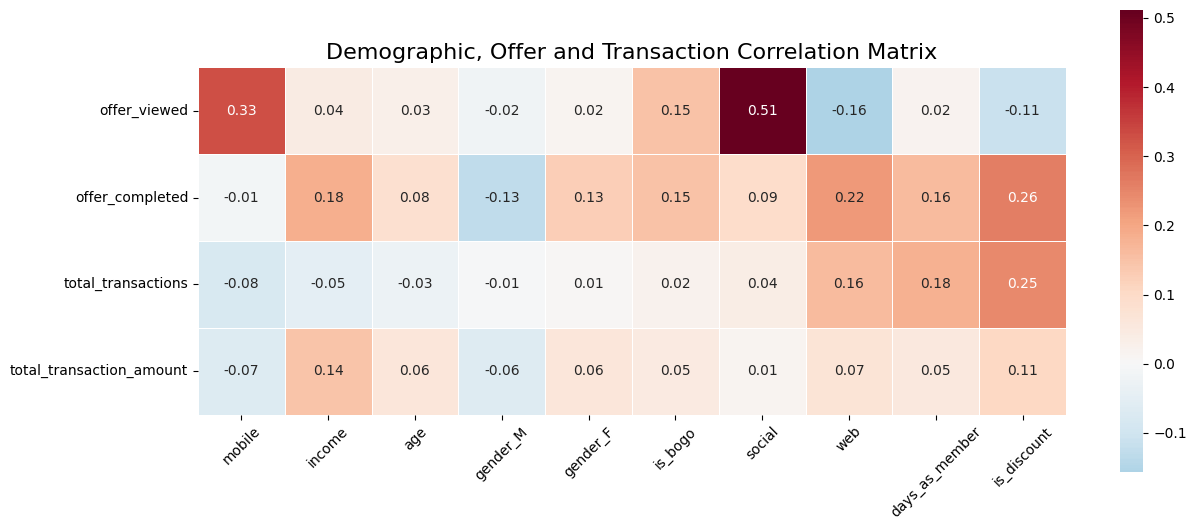

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap without a mask and with the correct aspect ratio for the transposed matrix
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            linewidths=.5, cbar_kws={"shrink": .5}, fmt=".2f", square=True)

# Add title and adjust font size for better readability
plt.title('Demographic, Offer and Transaction Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

## General Insights

* **Channel Impact:** Social channels strongly influence offer viewing, while web channels negatively impact offer viewing but positively impact offer completion and total transactions.
* **Offer Type:** BOGO offers are more likely to be viewed, while discount offers are more likely to be completed and lead to more transactions.
* **Demographics:** Higher income and longer membership durations positively impact offer completion and total transactions. Gender differences are evident, with females showing higher offer completion rates compared to males.